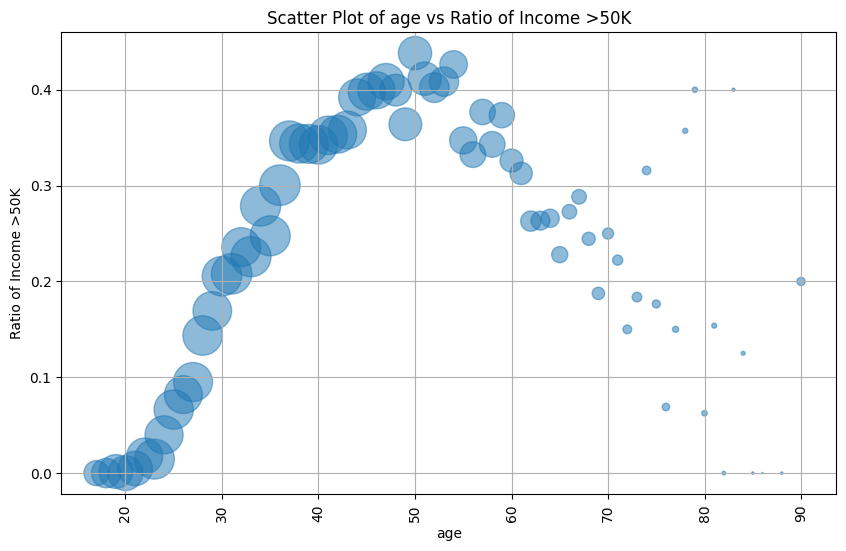

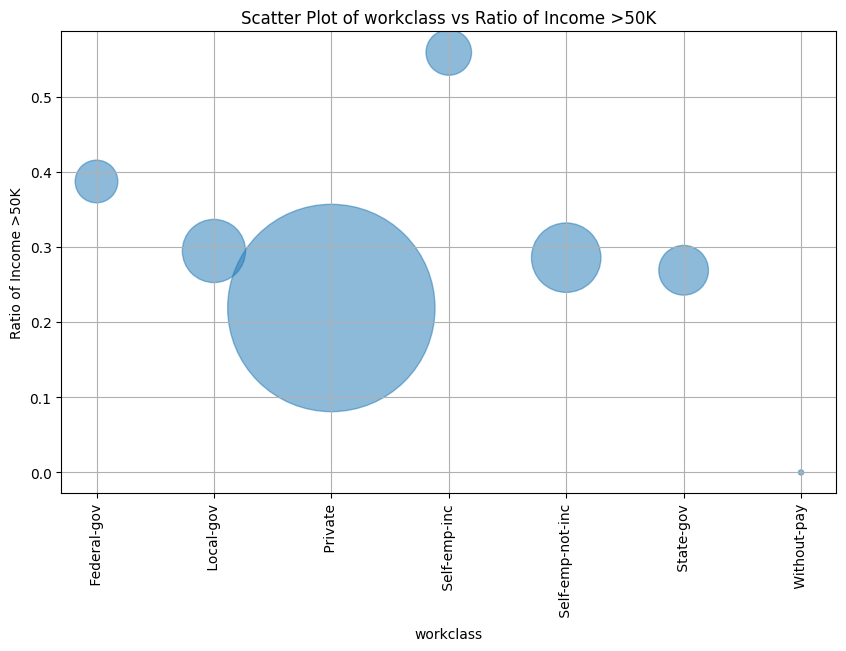

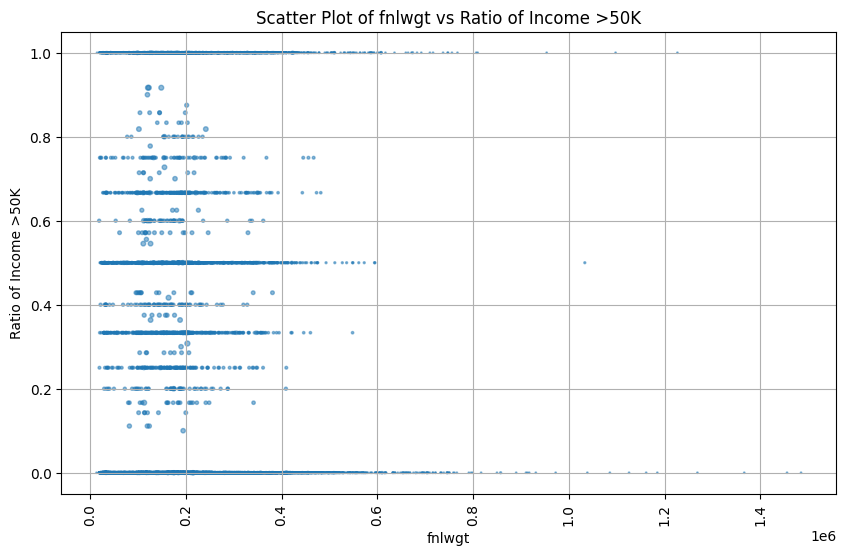

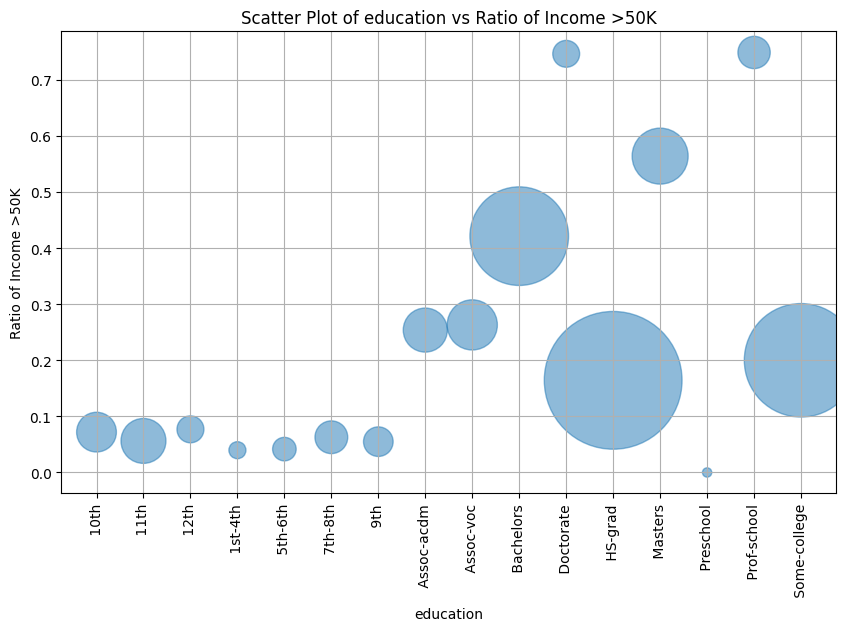

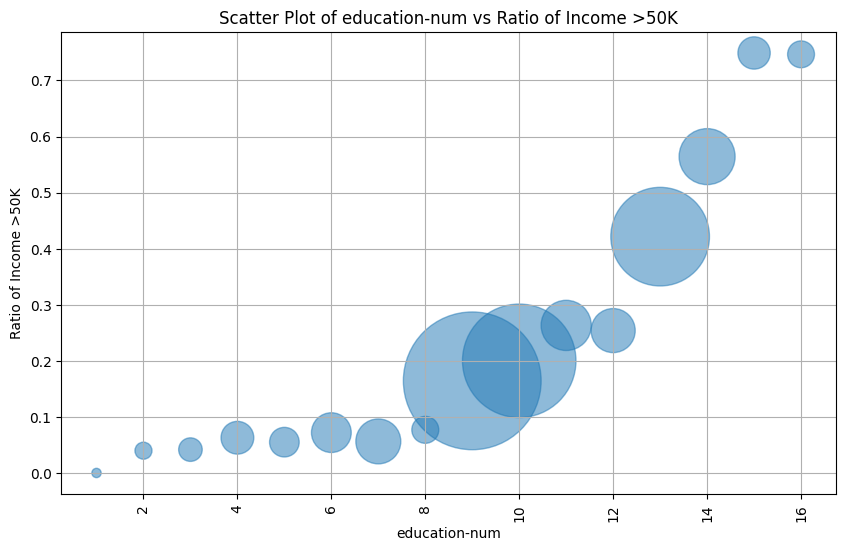

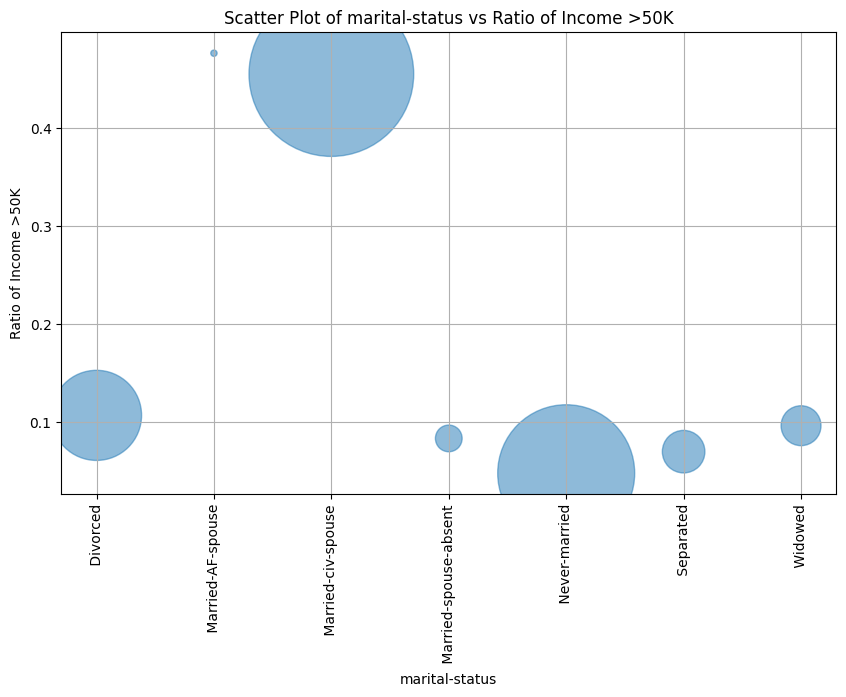

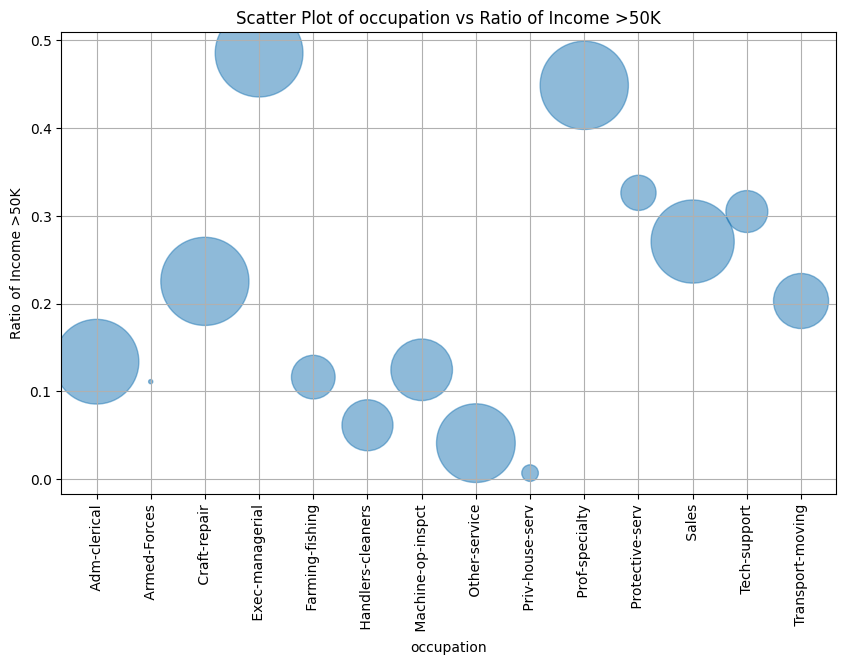

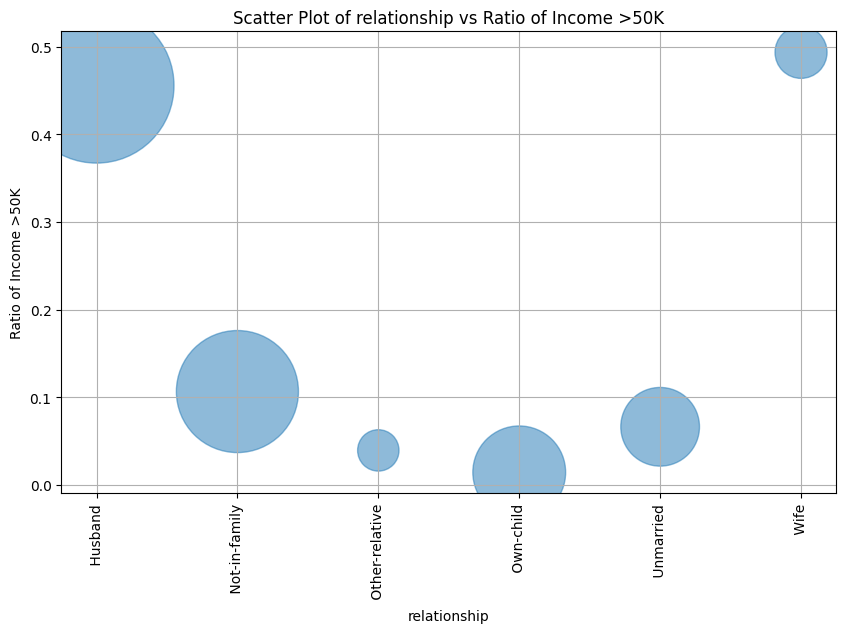

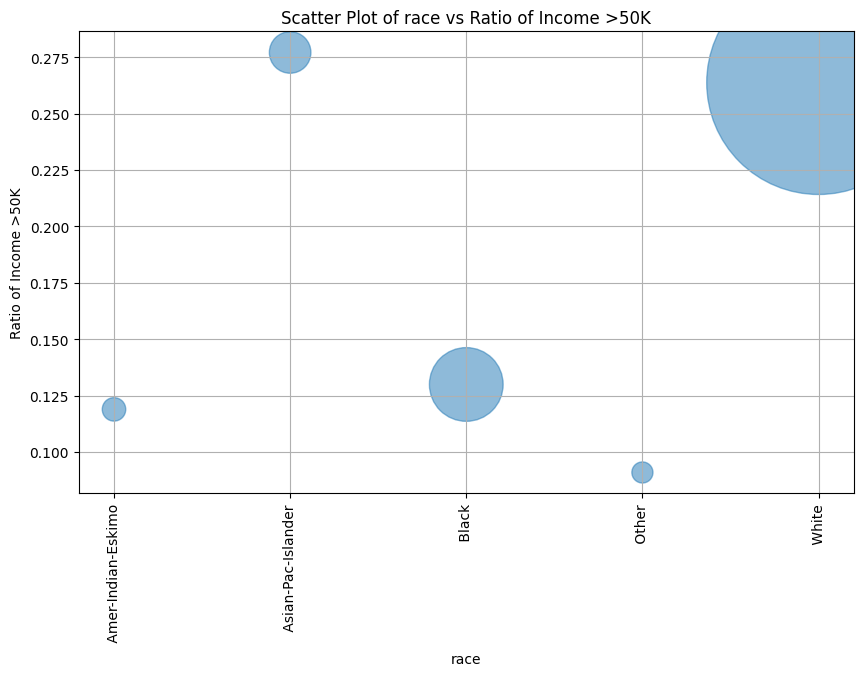

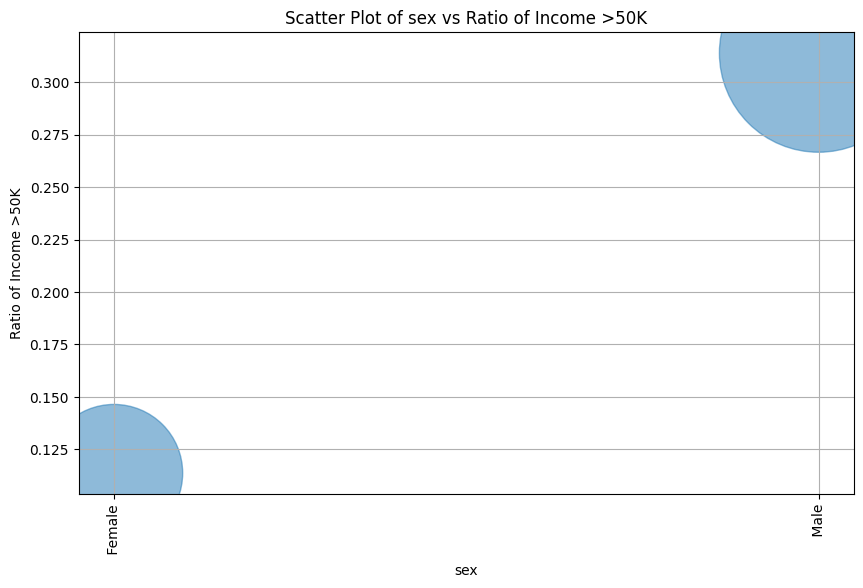

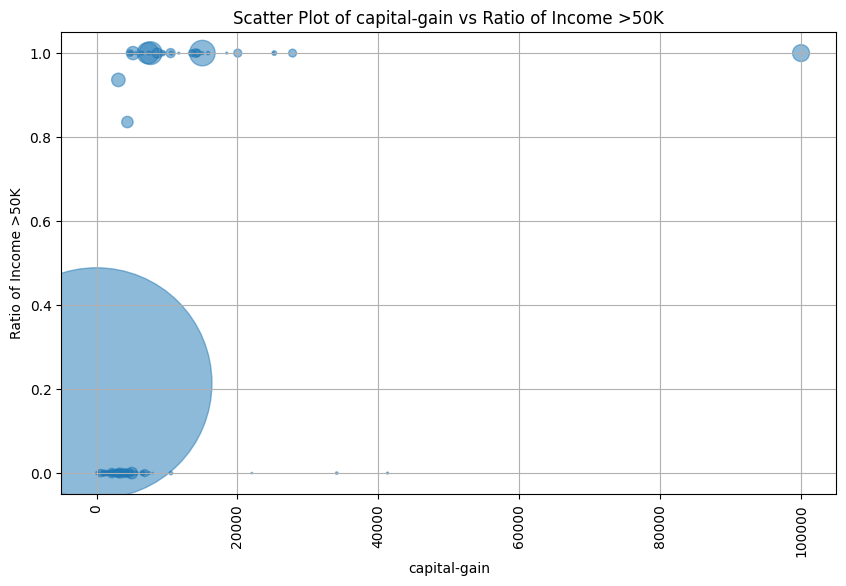

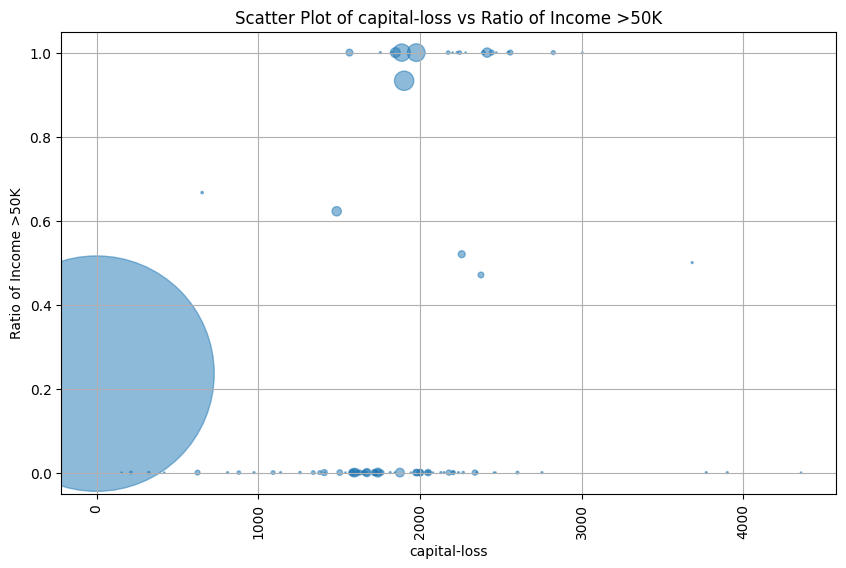

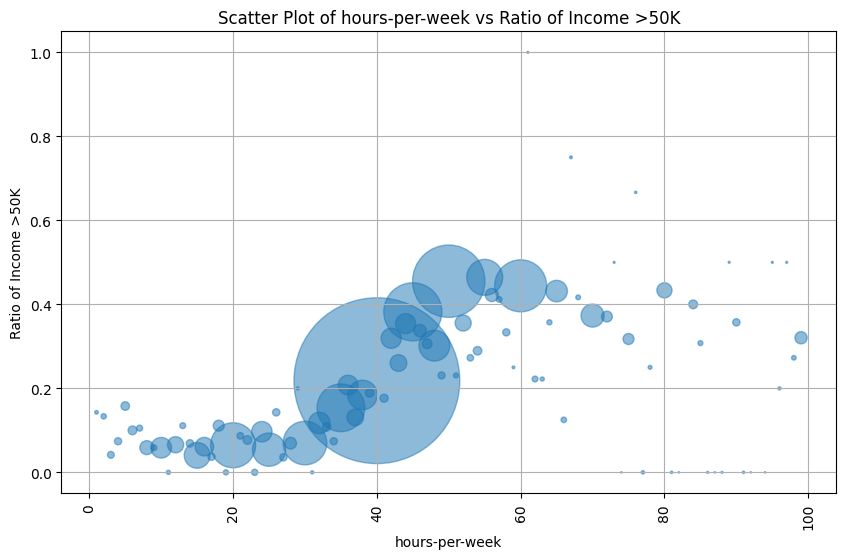

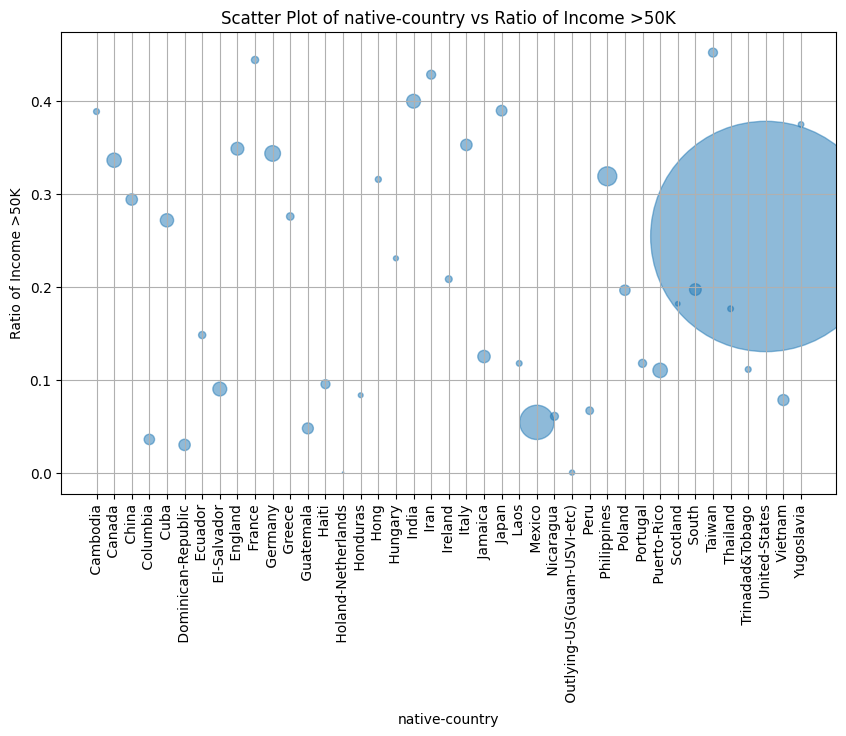

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('./data/adult.data', header=None, na_values=' ?')
data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
                "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

# Handle missing data
data = data.dropna()

# Encode the income column
data["income"] = data["income"].apply(lambda x: 1 if x == " >50K" else 0)

# Function to calculate ratio and sample size
def calculate_ratio_and_size(feature):
    grouped = data.groupby(feature)["income"]
    ratio = grouped.mean()
    size = grouped.count()
    return ratio, size

# List of all features
all_features = data.columns[:-1]

# Create scatter plots
for feature in all_features:
    ratio, size = calculate_ratio_and_size(feature)
    plt.figure(figsize=(10, 6))
    plt.scatter(ratio.index, ratio.values, s=size, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Ratio of Income >50K')
    plt.title(f'Scatter Plot of {feature} vs Ratio of Income >50K')
    plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
    plt.grid(True)
    plt.show()
